<a href="https://colab.research.google.com/github/delacruzsebastian-cpu/Proyect-Cell-phone-classification-ML/blob/main/Proyect-Cell-phone-classification-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyect Cell phone classification-ML
**SEBASTIAN DE LA CRUZ**

**NATALIA GUEVARA**


In [71]:
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from scipy.spatial import distance
from sklearn import svm
# Implementación de Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler #Escalizar datos 
# Métricas a implementar
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




**Dataset Upload (See README)**

In [72]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [73]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [74]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Data pre-processing**

In [75]:
features = ['battery_power', 'fc', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'px_width', 'sc_h', 'sc_w', 'talk_time','blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi']
label = ['price_range']
X=data[features]
y=data[label]

X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30, shuffle=True)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train=X_train_scaled
X_test=X_test_scaled

# Modelos de clasificación

**K Nearest Neighbors Classifier**

*Best neighbors number selection (k)*

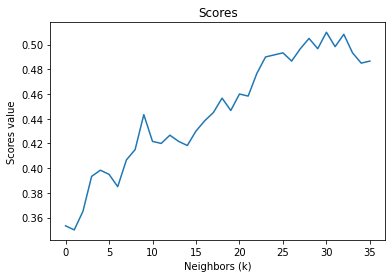

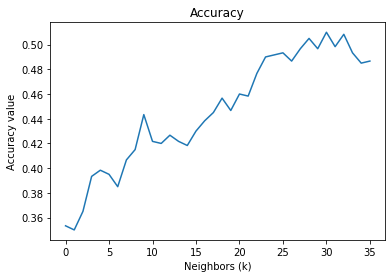

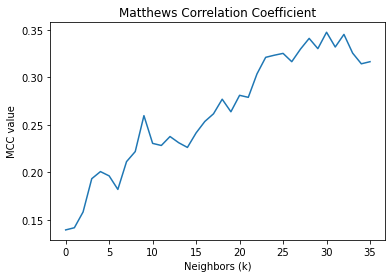

Best k by Scores: 31 . Value: 0.51
Best k by Accuracy: 31 . Value: 0.51
Best k by MCC: 31 . Value: 0.3475966786667766


In [76]:
k_range = range(1, int(np.sqrt(len(y_train))))

#Distances: euclidean. manhattan. chebyshev. minkowski. seuclidean. mahalanobis. hamming
distance='euclidean'

scores = []
acc = []
MCC = []
F1 = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', metric=distance, metric_params=None, algorithm='brute')
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  y_test_predict = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_test_predict))
  MCC.append(matthews_corrcoef(y_test, y_test_predict))

plt.plot(scores)
plt.title("Scores")
plt.xlabel("Neighbors (k)")
plt.ylabel("Scores value")
plt.show()
plt.plot(acc)
plt.title("Accuracy")
plt.xlabel("Neighbors (k)")
plt.ylabel("Accuracy value")
plt.show()
plt.plot(MCC)
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Neighbors (k)")
plt.ylabel("MCC value")
plt.show()

print("Best k by Scores:",k_range[np.argmax(scores)],". Value:",scores[np.argmax(scores)])
print("Best k by Accuracy:",k_range[np.argmax(acc)],". Value:",acc[np.argmax(acc)])
print("Best k by MCC:",k_range[np.argmax(MCC)],". Value:",MCC[np.argmax(MCC)])

*We will use the best MCC result, as it takes into consideration every possible error type*

In [78]:
n_neighbors = 31

knn = KNeighborsClassifier(n_neighbors, weights='uniform', metric=distance, metric_params=None, algorithm='auto')
knn = knn.fit(X_train, y_train)

y_predict=knn.predict(X_train)
print('Train subset')
print('Accuracy of K-NN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of K-NN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_knn=knn.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of K-NN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_knn)))
print('MCC of K-NN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_knn)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of K-NN classifier on training set: 0.58429
MCC of K-NN classifier on training set: 0.44627

Test subset
Accuracy of K-NN classifier on test set: 0.51000
MCC of K-NN classifier on test set: 0.34760

Classification time: 0.05736 s


**Logistic Regression Classifier**

In [79]:
#Solvers: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

log_reg = LogisticRegression(C=0.1, random_state=1, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_predict=log_reg.predict(X_train)
print('Train subset')
print('Accuracy of LR classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of LR classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_LR=log_reg.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of LR classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_LR)))
print('MCC of LR classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_LR)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of LR classifier on training set: 0.80429
MCC of LR classifier on training set: 0.74333

Test subset
Accuracy of LR classifier on test set: 0.77500
MCC of LR classifier on test set: 0.70390

Classification time: 0.00097 s


**Kernel-SVM classifier**

In [67]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel])

#polinomial cuadrático
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=2)

#polinomial cúbico
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#rbf 
#Kernel=3
#msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

y_predict=msv.predict(X_train)
print('Train subset')
print('Accuracy of SVM classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of SVM classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_SVM=msv.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of SVM classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_SVM)))
print('MCC of SVM classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_SVM)))
print('\nClassification time: {:.5f}'.format(time),'s')


Train subset
Accuracy of SVM classifier on training set: 0.99357
MCC of SVM classifier on training set: 0.99143

Test subset
Accuracy of SVM classifier on test set: 0.87833
MCC of SVM classifier on test set: 0.83820

Classification time: 0.01265 s


# PCA Analysis

**Determining Principal Components**

In [69]:
from tabulate import tabulate
from sklearn.decomposition import PCA
var = np.var(X, axis=0)
percentage = (var/np.sum(var))*100
print("Percentage of total variance explained by every characteristic:\n")
print(tabulate([percentage]))

Percentage of total variance explained by every characteristic:

------  ----------  ----------  ---------  -----------  ---------  -----------  ----------  -------  -------  -------  ----------  ----------  ----------  -----------  -----------  -----------  -----------  -----------  -----------
11.001  0.00107386  3.7937e-05  0.0187597  4.73931e-06  0.0713963  0.000298214  0.00209528  11.2206  67.0383  10.6426  0.00101137  0.00108127  0.00170095  1.42492e-05  1.42455e-05  1.42243e-05  1.03527e-05  1.42502e-05  1.42479e-05
------  ----------  ----------  ---------  -----------  ---------  -----------  ----------  -------  -------  -------  ----------  ----------  ----------  -----------  -----------  -----------  -----------  -----------  -----------


**PCA fitting**

In [70]:
pca = PCA(n_components=1,whiten=True,svd_solver='arpack')
pca.fit(X)
X_PCA = pca.transform(X)

X_PCA_train, X_PCA_test, y_train, y_test = train_test_split(X_PCA, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_PCA_train)
X_PCA_train = scaler.transform(X_PCA_train)
X_PCA_test = scaler.transform(X_PCA_test)

**PCA Classifiers**

*Kernel-SVM with PCA*

In [37]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel])

#polinomial cuadrático
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=2)

#polinomial cúbico
Kernel=1
msv_PCA = svm.SVC(kernel=kernels[Kernel],degree=3)
#rbf 
#Kernel=3
#msv = svm.SVC(kernel=kernels[Kernel],degree=3)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv_PCA.fit(X_PCA_train, y_train)

y_PCA_predict=msv_PCA.predict(X_PCA_train)
print('Train subset with PCA')
print('Accuracy of SVM classifier with PCA on training set: {:.5f}'
     .format(accuracy_score(y_train, y_PCA_predict)))
print('MCC of SVM classifier with PCA on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_PCA_predict)))

t0 = timeit.default_timer()
y_PCA_predict_SVM=msv_PCA.predict(X_PCA_test)
time = timeit.default_timer() - t0
print('\nTest subset with PCA')
print('Accuracy of SVM classifier with PCA on test set: {:.5f}'
     .format(accuracy_score(y_test, y_PCA_predict_SVM)))
print('MCC of SVM classifier with PCA on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_PCA_predict_SVM)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset with PCA
Accuracy of SVM classifier with PCA on training set: 0.72933
MCC of SVM classifier with PCA on training set: 0.64611

Test subset with PCA
Accuracy of SVM classifier with PCA on test set: 0.72400
MCC of SVM classifier with PCA on test set: 0.64302

Classification time: 0.00663 s
